In [1]:
#Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.device_count()

1

In [4]:
torch.cuda.current_device()

0

In [5]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3060'

In [6]:
#Set Parameters here
epochs = 200000
batch_size = 1000
train_points = 1000 # 60k total training examples, 10k test examples
test_points = 1000
lr = 0.001
weight_decay = 0.01
initialization_scale = 8.0
#Optmization steps should be train_points/batchsize * epochs 
print(train_points/batch_size * epochs)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


200000.0


In [7]:
print(device)

cuda:0


In [8]:
#Network Structure
class mnistClassification(nn.Module):
    def __init__(self):
        super(mnistClassification, self).__init__()
        self.flatten = nn.Flatten().to(device)
        self.fc1 = nn.Linear(784, 200).to(device)
        self.fc2 = nn.Linear(200, 200).to(device)
        self.fc3 = nn.Linear(200, 10).to(device)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

model = mnistClassification().to(device)

with torch.no_grad(): 
    for p in model.parameters(): 
        p.data = initialization_scale * p.data

In [9]:
#Load Data set
train = torchvision.datasets.MNIST(root='mnistdata', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test = torchvision.datasets.MNIST(root='mnistdata', train=False, transform=torchvision.transforms.ToTensor(), download=True)
train = torch.utils.data.Subset(train, range(train_points))
test = torch.utils.data.Subset(test, range(test_points))
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

print(len(train_loader))
print(len(test_loader))

1
1


Epoch [10000/200000], Loss: 0.0298, Train Accuracy: 0.7070, Val Accuracy: 0.6480, Weight Norm: 142.2378:   5%|▍         | 9999/200000 [10:29<3:20:39, 15.78it/s]

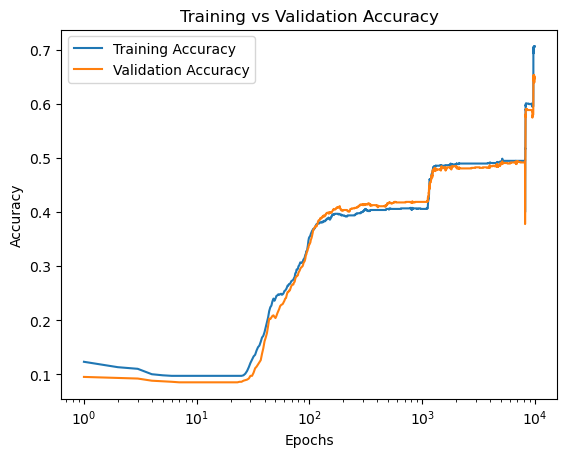

Epoch [20000/200000], Loss: 0.0018, Train Accuracy: 0.9820, Val Accuracy: 0.8650, Weight Norm: 132.0966:  10%|▉         | 19999/200000 [21:15<3:26:49, 14.51it/s]

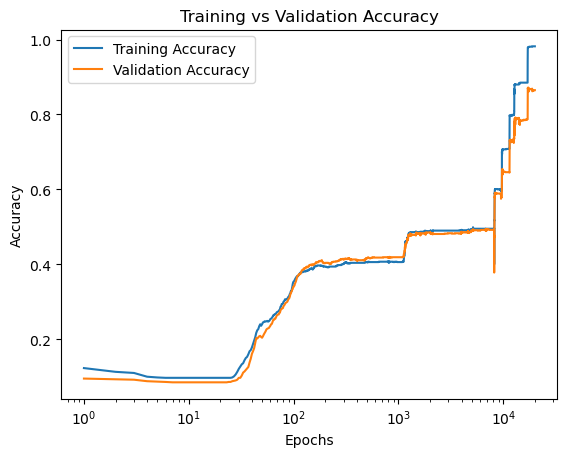

Epoch [30000/200000], Loss: 0.0012, Train Accuracy: 0.9880, Val Accuracy: 0.8620, Weight Norm: 122.4563:  15%|█▍        | 29999/200000 [31:45<2:46:44, 16.99it/s]

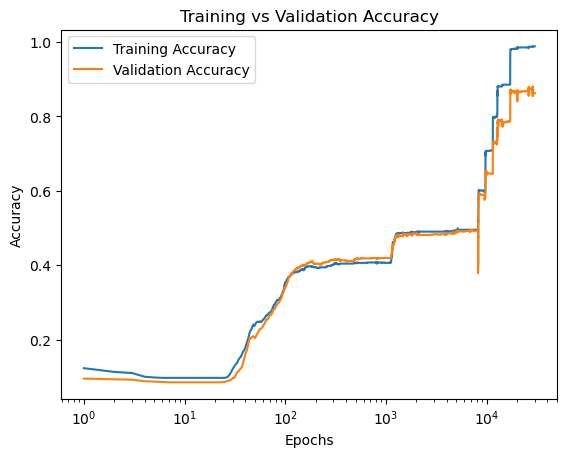

Epoch [40000/200000], Loss: 0.0010, Train Accuracy: 0.9900, Val Accuracy: 0.8820, Weight Norm: 111.8685:  20%|█▉        | 39999/200000 [41:47<2:49:45, 15.71it/s]

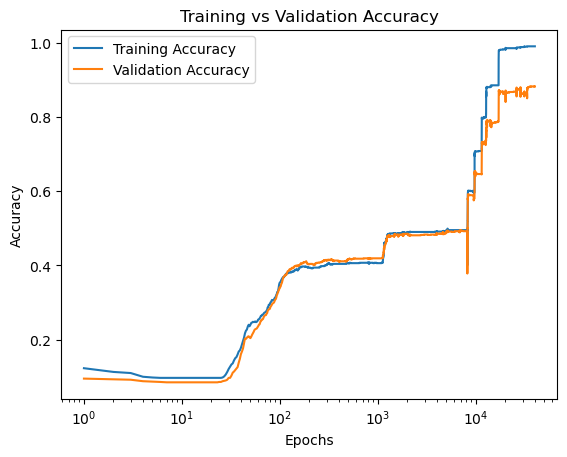

Epoch [50000/200000], Loss: 0.0006, Train Accuracy: 0.9940, Val Accuracy: 0.8890, Weight Norm: 105.2955:  25%|██▍       | 49999/200000 [52:37<2:34:30, 16.18it/s]

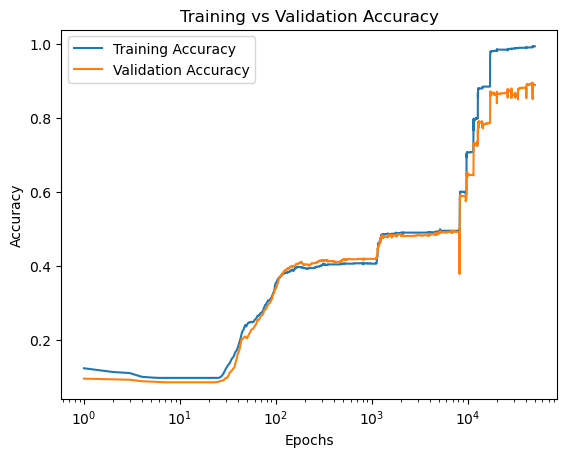

Epoch [60000/200000], Loss: 0.0005, Train Accuracy: 0.9950, Val Accuracy: 0.8920, Weight Norm: 95.8474:  30%|██▉       | 59999/200000 [1:03:20<2:17:24, 16.98it/s]

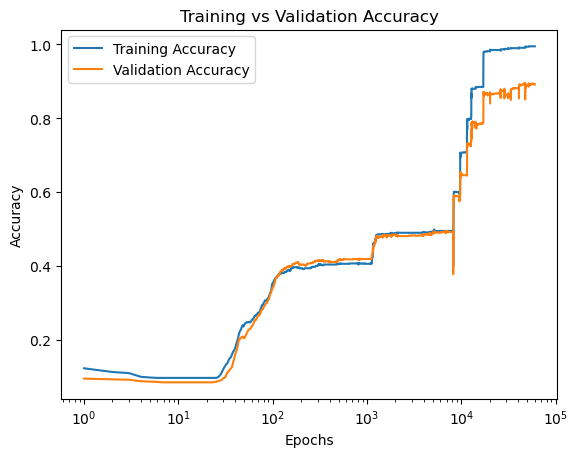

Epoch [70000/200000], Loss: 0.0004, Train Accuracy: 0.9960, Val Accuracy: 0.8940, Weight Norm: 89.2357:  35%|███▍      | 69999/200000 [1:14:14<2:25:04, 14.94it/s]

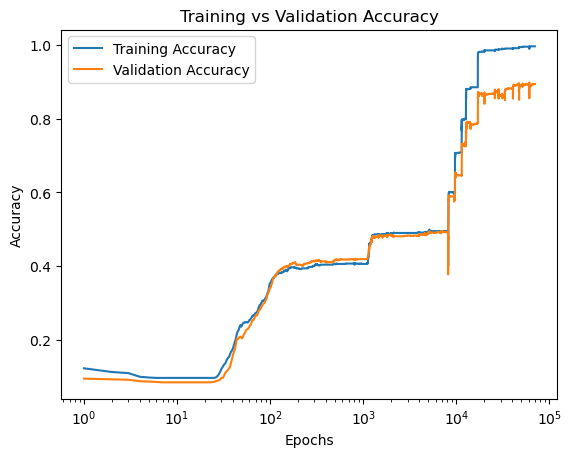

Epoch [80000/200000], Loss: 0.0004, Train Accuracy: 0.9960, Val Accuracy: 0.8960, Weight Norm: 81.4139:  40%|███▉      | 79999/200000 [1:25:14<2:13:57, 14.93it/s]

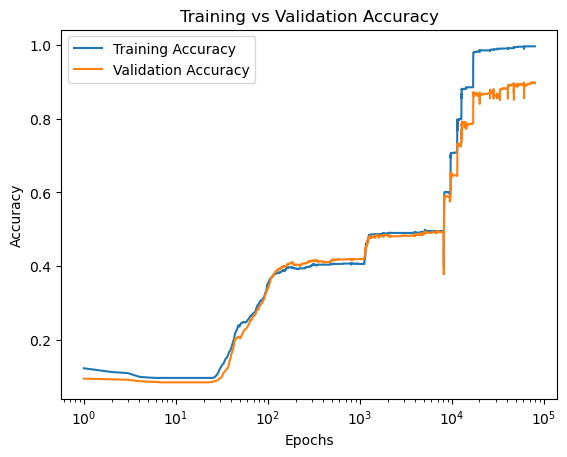

Epoch [90000/200000], Loss: 0.0004, Train Accuracy: 0.9960, Val Accuracy: 0.8980, Weight Norm: 74.4730:  45%|████▍     | 89998/200000 [1:36:14<2:05:47, 14.57it/s]

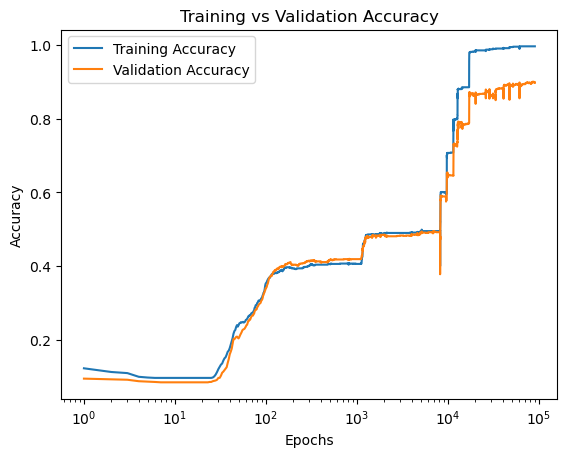

Epoch [100000/200000], Loss: 0.0004, Train Accuracy: 0.9960, Val Accuracy: 0.8960, Weight Norm: 68.4259:  50%|████▉     | 99998/200000 [1:46:56<1:46:01, 15.72it/s]

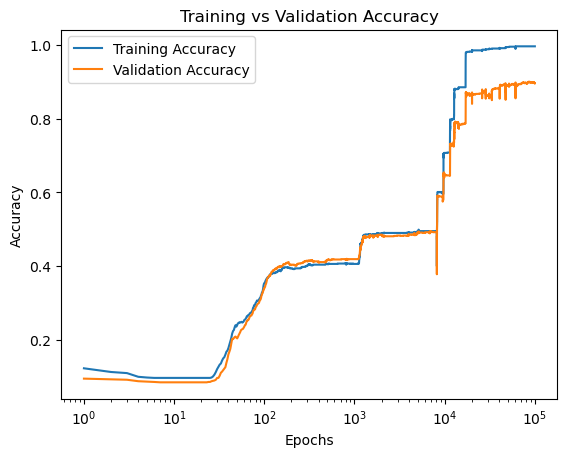

Epoch [110000/200000], Loss: 0.0004, Train Accuracy: 0.9960, Val Accuracy: 0.8960, Weight Norm: 63.1662:  55%|█████▍    | 109998/200000 [1:57:08<1:30:04, 16.65it/s]

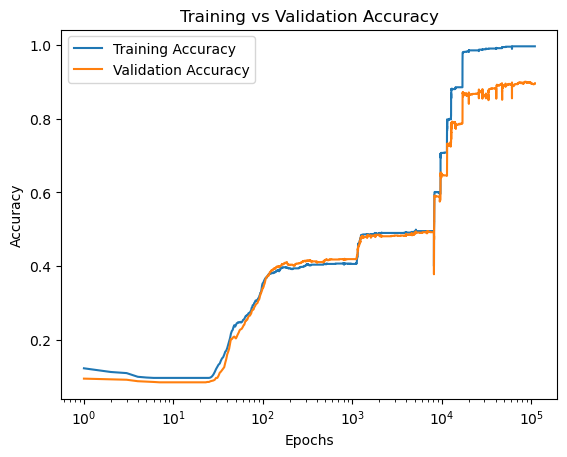

Epoch [120000/200000], Loss: 0.0003, Train Accuracy: 0.9970, Val Accuracy: 0.8990, Weight Norm: 61.8850:  60%|█████▉    | 119998/200000 [2:07:15<2:10:48, 10.19it/s]

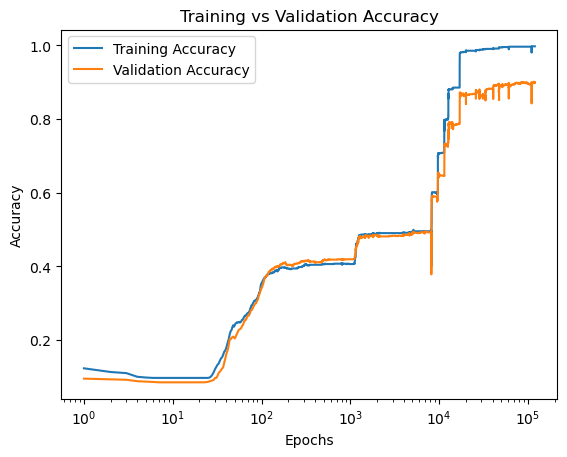

Epoch [130000/200000], Loss: 0.0003, Train Accuracy: 0.9970, Val Accuracy: 0.9020, Weight Norm: 57.2129:  65%|██████▍   | 129998/200000 [2:17:34<1:13:02, 15.97it/s]

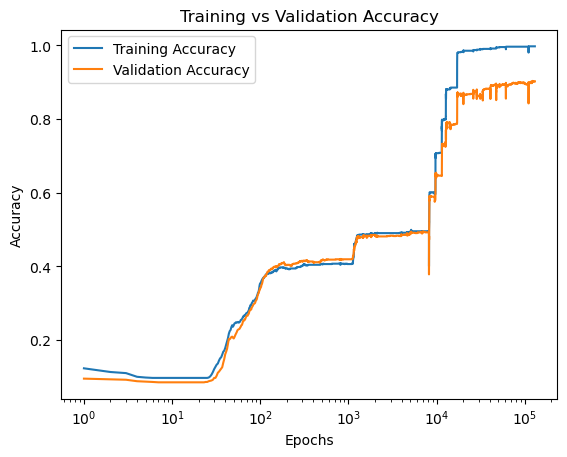

Epoch [140000/200000], Loss: 0.0003, Train Accuracy: 0.9970, Val Accuracy: 0.9000, Weight Norm: 53.1198:  70%|██████▉   | 139998/200000 [2:27:51<59:34, 16.79it/s]  

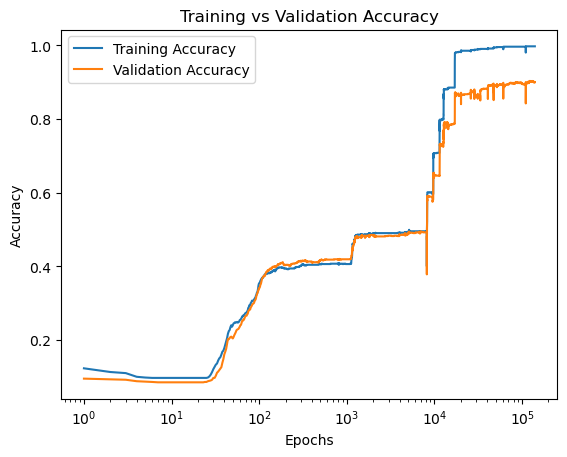

Epoch [150000/200000], Loss: 0.0003, Train Accuracy: 0.9970, Val Accuracy: 0.9000, Weight Norm: 49.6347:  75%|███████▍  | 149998/200000 [2:39:37<50:08, 16.62it/s]  

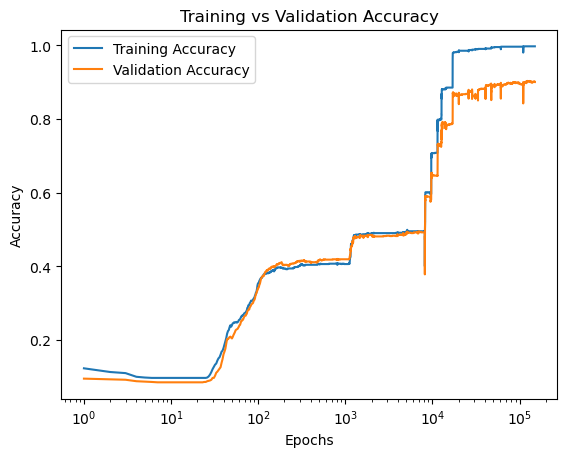

Epoch [160000/200000], Loss: 0.0003, Train Accuracy: 0.9970, Val Accuracy: 0.9040, Weight Norm: 46.6494:  80%|███████▉  | 159998/200000 [2:50:20<42:41, 15.62it/s]  

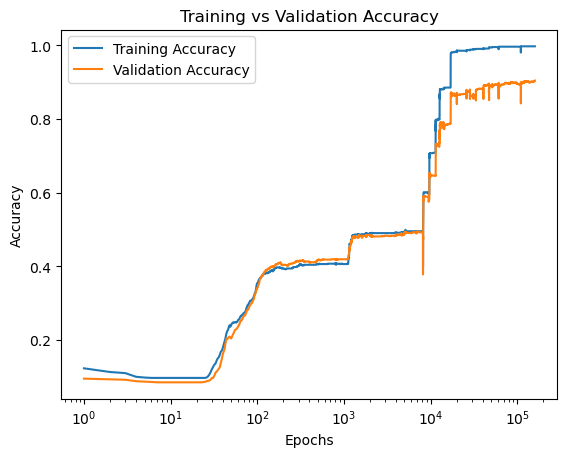

Epoch [161661/200000], Loss: 0.0003, Train Accuracy: 0.9970, Val Accuracy: 0.9040, Weight Norm: 46.1955:  81%|████████  | 161660/200000 [2:52:09<39:40, 16.11it/s]  

In [ ]:
#Training

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

train_acc = []
val_acc = []
train_loss = []
weight_normlist = []

#Loop
bar = tqdm(range(epochs))
for epoch in bar:
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        labels_one_hot = F.one_hot(labels, 10).float()
        loss = criterion(outputs, labels_one_hot)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate Train Accuracy
    _, predicted = torch.max(outputs.data, 1)
    correct_train += (predicted == labels).sum().item()
    total_train += labels.size(0)
    train_accuracy = correct_train / total_train
    train_acc.append(train_accuracy)
    
    # Store loss
    train_loss.append(loss.item())
    
    # Calculate Validation Accuracy
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for x, labels in test_loader:
            x = x.to(device)
            labels = labels.to(device)
            y = model(x)
            _, predicted = torch.max(y, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    val_accuracy = correct / total
    val_acc.append(val_accuracy)

    # Calculate Weight Norm
    weight_norm = sum(p.norm().item() for p in model.parameters())
    weight_normlist.append(weight_norm)
    
    # Print progress
    bar.set_description(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}, Weight Norm: {weight_norm:.4f}')
    
    # Plot graph every 50,000 epochs
    if (epoch + 1) % 10000 == 0:
        import matplotlib.pyplot as plt
        plt.xscale("log")
        plt.plot(range(1, epoch + 2), train_acc, label='Training Accuracy')
        plt.plot(range(1, epoch + 2), val_acc, label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Training vs Validation Accuracy')
        plt.legend()
        plt.show()


In [ ]:
#Evaluate
model.eval()
total = 0
correct = 0
one_hots = torch.eye(10, 10)
with torch.no_grad():
        for x, labels in test_loader:
            x = x.to(device)
            labels = labels.to(device)
            y = model(x)
            _, predicted = torch.max(y,1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)


print(f'Accuracy: {100 * correct / total:.2f}%')

Accuracy: 79.20%


Accuracy: 79.20%


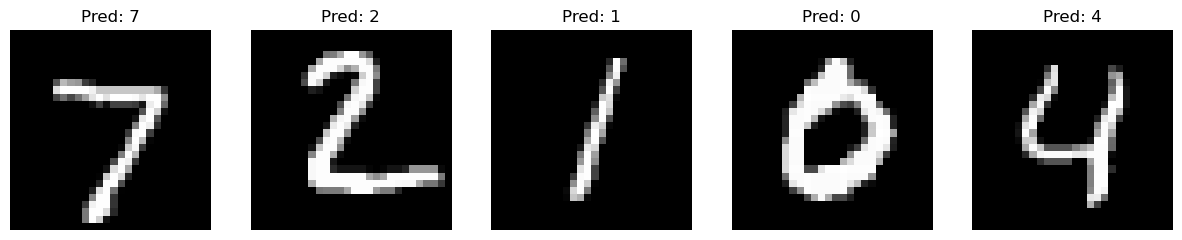

In [ ]:
import matplotlib.pyplot as plt

# Function to display images and predictions
def display_predictions(model, testloader, num_images=5):
    model.eval()
    images, labels = next(iter(testloader))
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i].to("cpu").numpy().squeeze(), cmap='gray')
        ax.set_title(f'Pred: {predicted[i].item()}')
        ax.axis('off')
    plt.show()

# Evaluate the model
model.eval()
correct = 0
total = 0
one_hots = torch.eye(10, 10)

with torch.no_grad():
    for x, labels in test_loader:
        x = x.to(device)
        labels = labels.to(device)
        y = model(x)
        _, predicted = torch.max(y, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f'Accuracy: {100 * accuracy:.2f}%')

# Display example predictions
display_predictions(model, test_loader, num_images=5)


In [ ]:
"""#Training

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

train_acc = []
val_acc = []
train_loss = []
weight_normlist = []

#Loop
bar = tqdm(range(epochs))
for epoch in bar:
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        labels_one_hot = F.one_hot(labels, 10).float()
        loss = criterion(outputs, labels_one_hot)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    #Calculate Train Accuracy
    _, predicted = torch.max(outputs.data, 1)
    correct_train += (predicted == labels).sum().item()
    total_train += labels.size(0)
    train_accuracy = correct_train / total_train
    train_acc.append(train_accuracy)
    #Store loss
    train_loss.append(loss)
    #Calculate Validation Accuracy
    model.eval()
    total = 0
    correct = 0
    one_hots = torch.eye(10, 10)
    with torch.no_grad():
            for x, labels in test_loader:
                y = model(x)
                _, predicted = torch.max(y,1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
    val_accuracy = correct / total
    val_acc.append(val_accuracy)

    #Calculate Weight Norm
    weight_norm = sum(p.norm().item() for p in model.parameters())
    weight_normlist.append(weight_norm)
    #print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')
    bar.set_description(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}, Weight Norm: {weight_norm:.4f}')"""

"#Training\n\ncriterion = nn.MSELoss()\noptimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)\n\ntrain_acc = []\nval_acc = []\ntrain_loss = []\nweight_normlist = []\n\n#Loop\nbar = tqdm(range(epochs))\nfor epoch in bar:\n    model.train()\n    running_loss = 0.0\n    correct_train = 0\n    total_train = 0\n    \n    for images, labels in train_loader:\n        optimizer.zero_grad()\n        outputs = model(images)\n        labels_one_hot = F.one_hot(labels, 10).float()\n        loss = criterion(outputs, labels_one_hot)\n        loss.backward()\n        optimizer.step()\n        running_loss += loss.item()\n\n    #Calculate Train Accuracy\n    _, predicted = torch.max(outputs.data, 1)\n    correct_train += (predicted == labels).sum().item()\n    total_train += labels.size(0)\n    train_accuracy = correct_train / total_train\n    train_acc.append(train_accuracy)\n    #Store loss\n    train_loss.append(loss)\n    #Calculate Validation Accuracy\n    model.eval()\n    tot